# Fluvial flood inundation mapping quick start

### [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/passah2o/pygeoflood/blob/master/doc/examples/fim_workflow_combined.ipynb)

On Google Colab, run the following command to install pygeoflood:

```bash
%pip install git+https://github.com/passah2o/pygeoflood
```


### Import libraries


In [2]:
!pip install git+https://github.com/passah2o/pygeoflood

from pathlib import Path
from pygeoflood import pyGeoFlood

  Cloning https://github.com/passah2o/pygeoflood to /tmp/pip-req-build-549vkl18
  Running command git clone --filter=blob:none --quiet https://github.com/passah2o/pygeoflood /tmp/pip-req-build-549vkl18
  Resolved https://github.com/passah2o/pygeoflood to commit e271a9f28c5bdd431dbe3ed16817fb6eee81fc79
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.8/467.8 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 8.4 MB/s

### Instantiate **pygeoflood** model class


In [3]:
pgf = pyGeoFlood(dem_path="data/OC1mTest.tif")

### Set paths to input datasets


In [4]:
pgf.flowline_path = "data/Flowline.shp"
pgf.catchment_path = "data/Catchment.shp"

# # we are not using these datasets for this example
# pgf.streamflow_forecast_path = "data/prod_nwm.t00z.analysis_assim.channel_rt.tm00.conus.nc"
# pgf.custom_flowline_path = Path(data_dir, "NHDPlus_H_1209_HU4_GDB.gdb")

### Download example input datasets if necessary


In [5]:
# make data directory if it doesn't exist
if not Path("data").is_dir():
    Path("data").mkdir()
# download input datasets if they doesn't exist
# DEM from USGS 3DEP
if not pgf.dem_path.is_file():
    !curl https://utexas.box.com/shared/static/id0in7w8yn38o59sexa50aqunsr7mzk0.tif -Lso data/OC1mTest.tif
# flowlines and catchments from NFIE (NHD MR) dataset
# https://www.arcgis.com/home/webmap/viewer.html?webmap=9766a82973b34f18b43dafa20c5ef535
if not pgf.flowline_path.is_file():
    !curl -sL https://utexas.box.com/shared/static/s1vlnymonbidnhul52oja7s83ky1212j.tgz | tar -xz -C data
if not pgf.catchment_path.is_file():
    !curl -sL https://utexas.box.com/shared/static/jzawwvmb2tjl4yqtnitgvfjcc4ho4tg5.tgz | tar -xz -C data

### Run full fluvial flood inundation mapping workflow


In [6]:
# set constant flowrate since we don't have a streamflow forecast
# see docs for `pyGeoFlood.config` and `pyGeoFlood.calculate_flood_stage`

pgf.config = {"calculate_flood_stage": {"custom_Q": 500}}

pgf.run_fim_workflow()

Running apply_nonlinear_filter with parameters:
    custom_dem = None
    custom_path = None
    method = PeronaMalik2
    smoothing_quantile = 0.9
    time_increment = 0.1
    n_iter = 50
    sigma_squared = 0.05
Computing slope of raw DTM
DEM slope array shape: (3378, 4750)
Computing lambda = q-q-based nonlinear filtering threshold
DEM smoothing Quantile: 0.9
Edge Threshold Value: 0.34356024861335754
Filtered DEM written to data/OC1mTest_filtered.tif
apply_nonlinear_filter completed in 25.7208 seconds

Running calculate_slope with parameters:
    custom_filtered_dem = None
    custom_path = None
 slope statistics
 min angle: 0.0
 max angle: 54.8638
 mean slope: 0.13960592
 stdev slope: 0.15432632
Slope raster written to data/OC1mTest_slope.tif
calculate_slope completed in 2.7261 seconds

Running calculate_curvature with parameters:
    custom_filtered_dem = None
    custom_path = None
    method = geometric
 using geometric curvature
 curvature statistics
 non-nan curvature cell numb

/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D LineString' is converted to 'LineString Z'
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D LineString' is converted to 'LineString Z'
  return ogr_read(


Endpoints csv written to data/OC1mTest_endpoints.csv
find_endpoints completed in 0.5665 seconds

Running calculate_binary_hand with parameters:
    custom_dem = None
    custom_flowline = None
    custom_path = None
Binary HAND raster written to data/OC1mTest_binary_hand.tif
calculate_binary_hand completed in 14.2915 seconds

Running extract_channel_network with parameters:
    custom_flowline = None
    custom_curvature = None
    custom_mfd_fac = None
    custom_endpoints = None
    custom_binary_hand = None
    custom_path = None
    retrace_flowline = True
    vector_extension = shp
    write_cost_function = False
    use_custom_flowline = False
    no_flowline = False
    custom_weight_curvature = None
    custom_weight_mfd_fac = None
    custom_weight_binary_hand = None
    custom_weight_custom_flowline = None
Retracing flowline...
Cost function weights:
curvature          0.2520 (mean flow accumulation)
mfd_fac            1.0000
binary_hand        0.7500
custom_flowline    0.000

### Plot flood inundation map


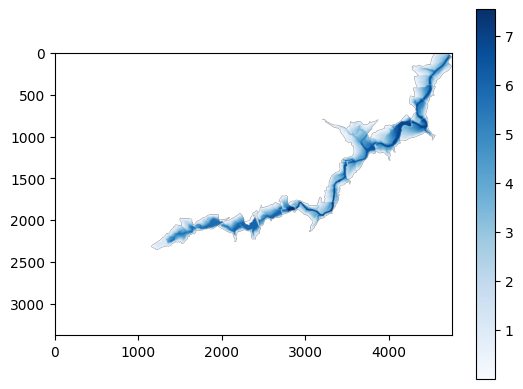

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio

with rio.open(pgf.fim_path) as ds:
    fim = ds.read(1)
    fim[fim == ds.nodata] = np.nan

plt.imshow(fim, cmap="Blues")
plt.colorbar()
plt.show()

All output files are saved in the `data` directory and can be downloaded for viewing with a GIS software such as QGIS


In [8]:
# save output data file paths we can load our pyGeoFlood instance later with
# pgf = pyGeoFlood.from_paths("data/paths.txt")
pgf.to_paths("data/paths.txt")

Paths written to data/paths.txt
